In [82]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

data = pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
data.head()

Saving EastWestAirlines.xlsx to EastWestAirlines (1).xlsx


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [83]:
df=data.drop(columns=['ID#'])
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


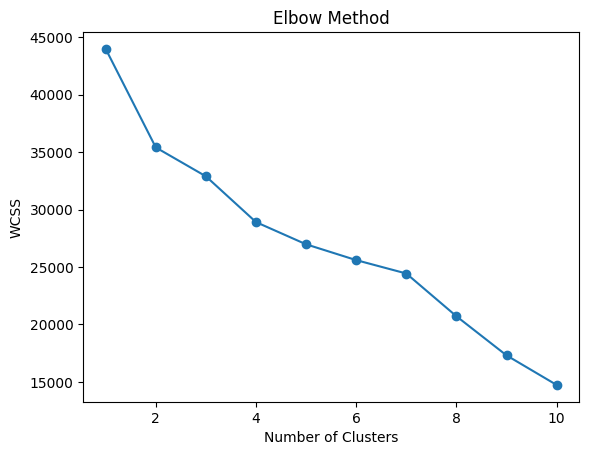

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [85]:
#The “elbow” typically appears at k = 3
#Beyond this point, improvement is marginal
#Optimal clusters = 3
km=KMeans(n_clusters=3,random_state=42)
km.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [86]:
pred=km.predict(df_scaled)
pred

array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

In [87]:
from sklearn.metrics import silhouette_score
score=silhouette_score(df_scaled,pred)
score

np.float64(0.2674062376813128)

In [88]:
df['KMeans_Cluster'] = km.fit_predict(df_scaled)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [91]:
kmeans_profile = df.groupby('KMeans_Cluster').mean()
kmeans_profile

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
KMeans_Cluster,,,,,,,,,,,
0,68022.381152,377.851309,1.633508,1.023037,1.000000,11078.913089,11.972775,978.223037,2.854450,4250.027225,0.943455
1,147282.027115,127.069414,4.146421,1.003254,1.052061,50995.211497,21.040130,675.880694,2.058568,5066.104121,0.629067
2,44098.164939,46.327992,1.344486,1.015551,1.000471,5166.961828,7.334119,133.081056,0.409519,3647.688501,0.000000


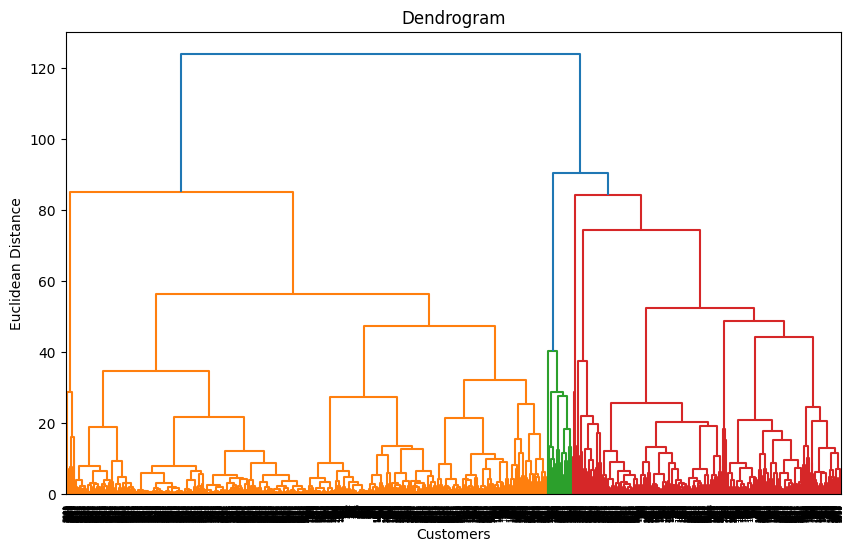

In [92]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()


In [ ]:
#Large vertical distance jump at 3 clusters
#Confirms K-Means result

In [93]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Hier_Cluster'] = hc.fit_predict(df_scaled)


In [94]:
hier_profile = df.groupby('Hier_Cluster').mean()
hier_profile


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster
Hier_Cluster,,,,,,,,,,,,
0,46718.863399,9.274407,1.242266,1.023303,1.000000,5037.792688,7.091201,221.167135,0.700281,3772.785858,0.188027,1.616312
1,116314.450725,363.839130,3.498551,1.000000,1.035507,37150.356522,18.066667,377.000000,1.150000,4696.888406,0.663043,0.789855
2,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846,0.407692


In [ ]:
#Cluster patterns will be similar to K-Means, validating results.

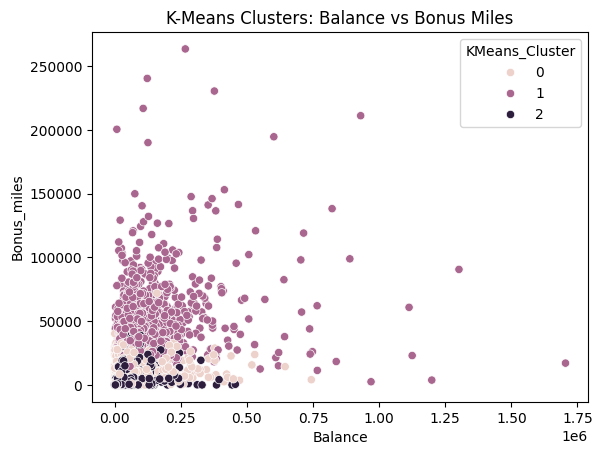

In [95]:
import seaborn as sns

sns.scatterplot(
    x='Balance',
    y='Bonus_miles',
    hue='KMeans_Cluster',
    data=df
)
plt.title('K-Means Clusters: Balance vs Bonus Miles')
plt.show()


In [ ]:
#Clustering analysis using K-Means and Hierarchical Clustering identified three distinct customer segments among frequent flyers.
#High-value customers showed higher balances, frequent flight activity, and greater award usage.
#Moderate customers exhibited average engagement, while low-engagement customers had minimal flight and bonus activity.
#These insights can be leveraged to design personalized loyalty programs and targeted promotional strategies.